<img src="lbnl_logo.jpg">

----




# Basic Stats and Inference in Pandas



---

    
### Table of Contents

1 - [Mean/Median/Mode](#section1)<br>

2 - [Histograms](#section2)<br>

3 - [Variance and Standard Deviation](#section3)<br>

4 - [Basic Trend Analysis and Linear Regression](#section4)<br>


## 1. Mean/Median/Mode <a id='section1'></a>

Let's say that you need to compile some basic statistics about your family for a class assignment. The assignment asks you to find out the weight and height of every member of your family and then do some basic analysis. You get the data from whomever you can get ahold of and store it in a bunch of lists.

In [2]:
# EXAMPLE

names = ['me', 'Younger Sister', 'Older Brother', 'Uncle Joe', 'Cousin Andrea']
weights = [170, 45, 170, 200, 70]
heights = [65, 50, 72, 72, 66]

You can't convert lists to Pandas dataframes easily so you need some kind of a temporary data structure which you can feed into Pandas. The Python dictionary data structure is the most similar to a Pandas dataframe so put your lists into a dictionary and then get Pandas to make a dataframe out of that. Python dictionaries operate the same way as regular (language) disctionaries: for each key (think: word) it has one or more values (think: translations). 

In the cell below, we are creating a `temporary_dictionary` in which we save all our lists under specific keys they correspond to.

In [21]:
# EXAMPLE

temporary_dictionary = {'family member': names, 'weight': weights, 'height': heights}
temporary_dictionary

{'family member': ['me',
  'Younger Sister',
  'Older Brother',
  'Uncle Joe',
  'Cousin Andrea'],
 'weight': [170, 45, 170, 200, 70],
 'height': [65, 50, 72, 72, 66]}

In the cell below, we convert our `dictionary` into a `DataFrame`. Each key will become a name of a column, and all the values under it will become values in that column. For example, our key **family members** will become a column with the same title that will have rows corresponding to each value we saved there initially, Since we used the list **names** for values, items of that list will become values in our column **family members**.

In [23]:
# EXAMPLE

import pandas as pd
my_data = pd.DataFrame(temporary_dictionary)
my_data

,family member,weight,height
0,me,170,65
1,Younger Sister,45,50
2,Older Brother,170,72
3,Uncle Joe,200,72
4,Cousin Andrea,70,66


It worked! Pandas figured out that the lists in your dictionary were actually columns. 

Now you have to find the average/mean, median, and mode of the weight and height of your family members. Thankfully, Pandas has you covered. If you run the `mean()` command on the entire dataframe it will automatically figure out which columns are numerical and compute the means.

The mean is just the arithmetic average of your data. To get the average value, Pandas adds up all of your data points and divides by the number of values.

In [24]:
# EXAMPLE

my_data.mean()

weight    131.0
height     65.0
dtype: float64

The Median of your data is the value which ends up in the middle (half way from the edges) if you were to arrange the data in ascending (aka increasing) order. To calculate median, we can call `median()` on our data.

In [27]:
# EXAMPLE

my_data.median()

weight    170.0
height     66.0
dtype: float64

The Mode is just the most common value. Of course, the names of your family members are all unique so Pandas can't figure out a Mode for the name column and returns you a weird dataframe with all the names still present. To find the most common numerical value, we can use `mode()` on our data.

In [28]:
# EXAMPLE

my_data.mode()

,family member,weight,height
0,Cousin Andrea,170.0,72.0
1,Older Brother,NaN,NaN
2,Uncle Joe,NaN,NaN
3,Younger Sister,NaN,NaN
4,me,NaN,NaN


In order to avoid this you can select your columns one by one with <b>.loc[:, column]</b> and run the `mode()` command on each column individually.

In [29]:
# EXAMPLE

# The mode of the weight column
my_data.loc[:, 'weight'].mode()

0    170
dtype: int64

In [30]:
# EXAMPLE

# The mode of the height column
my_data.loc[:, 'height'].mode()

0    72
dtype: int64

The mean, median, and mode are all essentially different types of "average" value. But as you have seen, they can give very different results with certain types of data. If you have a large and random dataset, like the ones we simulated with np.random.rand, these three types of averages will be the same or almost the same. Most data we encounter in nature will be random, but when we collect data, it is easy to unintentionally skew it to one side or another if we aren't careful in how we obtain that data. 

<br> <br>
Our dataset wasn't "random enough". It was too small and this made it easily influenced by the particular data points we captured with our survey. To illustrate that, let's see what happens if your younger sister gets wind of why you are asking everyone their weights and starts to insist that her chihuahua "is absolutely part of the family and needs to be counted!"

In [31]:
# EXAMPLE

my_data = my_data.append({'family member': 'chihuahua', 'weight': 5, 'height': 7}, ignore_index = True)
my_data

,family member,weight,height
0,me,170,65
1,Younger Sister,45,50
2,Older Brother,170,72
3,Uncle Joe,200,72
4,Cousin Andrea,70,66
5,chihuahua,5,7


What happens to our averages then? 

In [34]:
# EXERCISE

#calculate mean/median/mode only for the column "weight"

print("The average is ", my_data...) #mean
print("The median is ", ...) #median
print("The mode is ", ...) #mode

The average is  110.0
The median is  120.0
The mode is  0    170
dtype: int64


The median and the mode stayed the same, but look at that mean dropping from 131 to 110. One extra row in our data and we see a dramatic change in the average. What if we add some other, even lighter pets to our dataset? We would essentially drag our average down by choosing what data we consider in our analysis. By analyzing these different types of averages we can check if a  dataset is truly random of if it was skewed or biased in some way.<br><br>
Do you think the same thing would happen if we added an extra data point to a dataset of millions of families? 

In [39]:
# EXAMPLE

import numpy as np
random_weights_array = np.random.normal(130, 62, 100000).astype(int)
random_weights = pd.DataFrame(random_weights_array).rename({0:'weight'}, axis = 1)
random_weights

,weight
0,46
1,220
2,206
3,161
4,89
...,...
99995,170
99996,130
99997,113
99998,178


We have created a DataFrame with 100,000 values. Let's see what our averages are now.

**Note:** your values can be slightly different everytime you rerun your code cells. Because our data is random, it will recreate values everytime.

In [41]:
# EXERCISE

print("The average is ", random_weights...) #mean
print("The median is ", ...) #median
print("The mode is ", ...) #mode

The average is  weight    129.48527
dtype: float64
The median is  weight    130.0
dtype: float64
The mode is     weight
0     133


Do you notice how our mean, median, and mode are very similar now that we have a lot of values and all the values were randomly generated?

In the cell below, we will append a value **5** to our data to see if it skews the averages.

In [44]:
# EXAMPLE

random_weights.append({'weight': 5}, ignore_index = True)

,weight
0,46
1,220
2,206
3,161
4,89
...,...
99996,130
99997,113
99998,178
99999,43


In [45]:
# EXAMPLE

random_weights.mean()

weight    129.48527
dtype: float64

Nope, the mean basically stays the same. Of course, we could still move our average up or down. We would just have to add a lot more than just one point, and that is a mistake which is much harder to make. And that is one of the reasons why researchers prefer bigger datasets: it's harder to have a significantly different result with just one outlier. Of course, first and foremost, your data needs to be good to begin with, but we won't go into details of it. If you want to learn more, here's a good [lecture about samples](https://ds100.org/fa20/lecture/lec02/). <br><br>

This is why data scientists and statisticians are so focused on these different types of averages, not only do they provide us with an easy way to summarise our findings, they can also tell us a lot about the quality of our datasets.

## 2. Histograms <a id='section2'></a>

Aside from looking at averages and other such summary values for our dataset, a histogram is the best way to quickly inspect your data and get a feel for what you are dealing with. You can create a histogram by calling `dataframe.hist()`. Pandas will automatically decide how many boxes to create in your histogram.

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

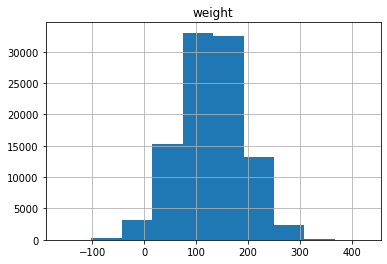

In [46]:
# EXAMPLE

random_weights.hist()

You can think of a histogram as a series of boxes. Each box contains data points of a certain magnitude. The more values you have at a certain value of your variable, the taller the box at that value. For example, in the histogram above you can see that most of the values are concentrated in the boxes between roughly 100 and 130 lbs, because that is the tallest box. The next tallest box is between about 130 and 160 lbs. It contains almost as many values as the tallest box but not quite.
<br><br>
The number on the vertical axis is just the number of values in that particular box. So we know that in the tallest box we have about 350 thousand values out of our total 1 million data points. 
<br><br>
You can create a histogram by adding `.hist()` to the name of your dataframe. If the dataframe has multiple numerical columns, Pandas will create a histogram for each column. This is one of the simplest and most useful types of graphs you can create with Pandas and you will get a lot of use out of it. So let's try to "read" one. 

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

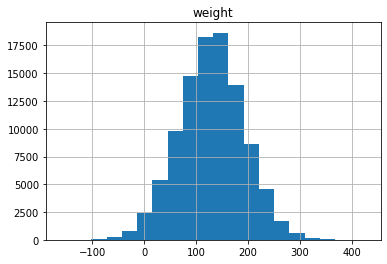

In [47]:
# EXAMPLE

random_weights.hist(bins=20)

If you want to see more boxes than the standard number of boxes `.hist()` creates, you can also specify the number of boxes you want it to create.

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

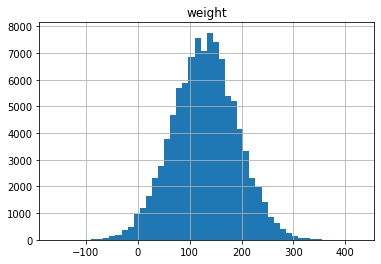

In [48]:
# EXAMPLE

random_weights.hist(bins=50)

The more bins you specify the smaller the number of points will fit in that box and the smaller the numbers on the vertical axis will become. 

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

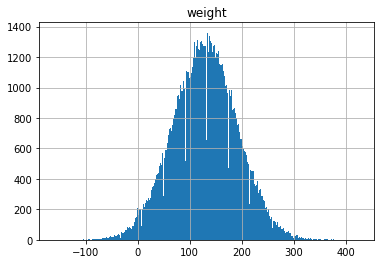

In [49]:
# EXAMPLE

random_weights.hist(bins=300)

If you create enough boxes (and you have enough data) you will see the true "shape" of your dataset. The data we have in random_weights is roughly "bell-shaped." As in, it looks like a bell. It starts off with very few data points at certain weights. Then the number increases to a peak around 130 lbs. And then it starts to decline toward 250 lbs. 
<br><br>
Incidentally, that is what a "mode" is, that tall peak at the center of our data distribution.
<br><br>

The data we use in these examples is totally random. But with your actual data the number of "boxes" should help you read it. So if you are a restaurant manager, and want to know how many people you need per shift; you will need to see when your restaurant is the busiest, so breaking it down by hour would make the most sense, and so on.

In the cells below we will recreate an example just like the one above, but this time we will work with store customers per hour. First, we will create an array of 10,000 random values from 0 to 23 (hours in a day).

In [119]:
# EXAMPLE

store_customers_array = np.random.normal(12, 3, 10000).astype(int)
store_customers = pd.DataFrame(store_customers_array).rename({0:'hours'}, axis = 1)
store_customers

,hours
0,14
1,16
2,8
3,16
4,11
...,...
9995,12
9996,7
9997,11
9998,17


Now, let's make a histogram of our **store_customers** column. 

array([[<AxesSubplot:title={'center':'hours'}>]], dtype=object)

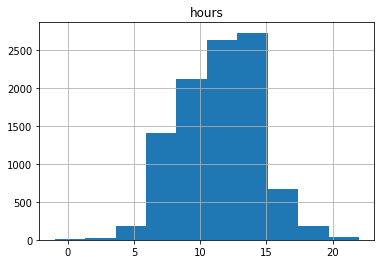

In [120]:
# EXERCISE

... 

Do you notice that your values are all around 12 pm? (We made it to be that way, your actual data of customer visits per hour would be very different). But if you were to decide at what hour to have bins ("boxes") for each hour, would it give you a better idea at what hours the store would need the most help?

array([[<AxesSubplot:title={'center':'hours'}>]], dtype=object)

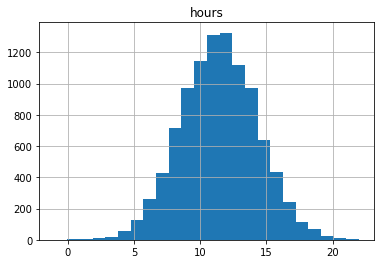

In [121]:
# EXERCISE

...

At what hour in a day would you recommend a manager to have the most staff members at work?

**Note:** Your histogram might look different everytime you run the cells above.

## 3. Variance and Standard Deviation <a id='section3'></a>

Real world data is often but not always conveniently shaped like the neat bell curve above. But when we know that it is bell-shaped, or when we can somehow force it to be bell-shaped by sampling correctly, we gain all kinds of insights into what to expect from that dataset. And knowing what to expect from seemingly random numbers can be extremely useful. This is why data science has been treated like somewhat of a superpower by those who don't know how to use it. This is also why it has been gaining such widespread acceptance and popularity in technology, finance, and almost any other field you can imagine. And it all boils down to being able to understand your data.


**Variance** and **standard deviation** are a key way to understand the shape of the so-called "normal distribution," the famous bell curve.

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

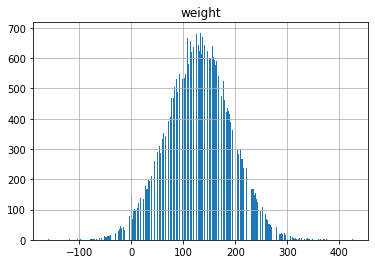

In [108]:
# EXAMPLE

random_weights.hist(bins=1000)

Our dataset in <b>random_weights</b> has a million points. But let's say that, for whatever reason, we didn't have access to all of this data and could only get some of the data points via a survey. This is what happened above when we only sample some members of our family.

Could we predict what the shape of the histogram is and be able to predict where all the points are?
    
If you look closely at the bell curve above, you can see that it is almost perfectly symmetrical. If we didn't have all of these data points, but we knew where the center of the bell is located on the horizontal axis, maybe we could determine what the true shape of the bell really is.

Since we don't have access to all the data, we'll just assume that the mean value of our sample is close to the mean value of the whole dataset. That's going to be the mean value we will use to reconstruct the bell curve for the full dataset.  

In [109]:
# EXAMPLE

my_sample = pd.DataFrame(temporary_dictionary)
my_sample

,family member,weight,height
0,me,170,65
1,Younger Sister,45,50
2,Older Brother,170,72
3,Uncle Joe,200,72
4,Cousin Andrea,70,66


In [110]:
# EXAMPLE

my_data.loc[:, 'weight'].mean()

110.0

One more thing we need to know is how spread out the dataset is from its peak. Again, we only have a sample but if we take the mean and subtract each data point out of our mean, we can get a measure for our spread, our distance from the mean. 

We could take out each value from the weight column in our survey data, but that would be tedious. Instead let's make Pandas do some work for us. Since Pandas treats each column like a Numpy array, we can just subtract the mean from the column to get a new column with the correct values. 

In [111]:
# EXAMPLE

sample_mean = my_data.loc[:, 'weight'].mean()
sample_weights = my_data.loc[:, 'weight']

distances_from_mean = sample_weights - sample_mean
distances_from_mean

0     60.0
1    -65.0
2     60.0
3     90.0
4    -40.0
5   -105.0
Name: weight, dtype: float64

Some of the values were smaller than the mean so they became negative and those which were higher than the mean stayed positive. We want to sum up these distances, but in order to prevent the negatives and positives from canceling each other out, let's square them before summing them up.

In [126]:
# EXAMPLE

#calculates len(distances_from_mean)

variance = sum(distances_from_mean ** 2)/5
variance

6430.0

The variance is a good measure of the spread of our data, but it does have that square in it. We can't just drop it because the negative and positive values will cancel out. Instead we will just take the square root of the variance to get what we call the standard deviation of our data. 

In [114]:
# EXAMPLE

standard_deviation = variance**0.5
standard_deviation

80.18728078691782

Now if we have all the ingredients to recreate our full distribution based on the sample data. We have our center for the bell curve, that's the sample mean. And we also have a measure for how spread out the histogram should be.

In [115]:
# EXAMPLE

recreated_data_array = np.random.normal(sample_mean, standard_deviation, 1000000).astype(int)
recreated_data =  pd.DataFrame(recreated_data_array)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

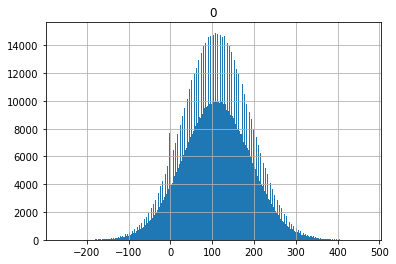

In [116]:
# EXAMPLE

recreated_data.hist(bins=300)

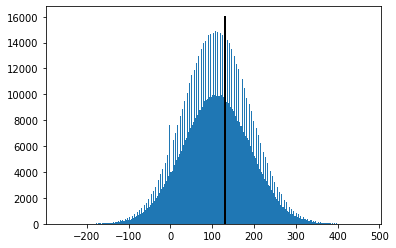

In [117]:
# EXAMPLE

import matplotlib.pyplot as plt
plt.hist(x=recreated_data, bins=300);
plt.plot([131, 131], [0, 16000], 'k-', lw=2);

As intended, our recreated data is centered around the mean value from our sample (131 lbs).

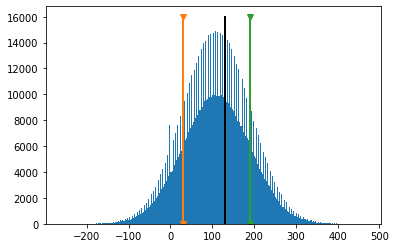

In [118]:
# EXAMPLE

plt.hist(x=recreated_data, bins=300);
plt.plot([131, 131], [0, 16000], 'k-', lw=2)
plt.plot([recreated_data.mean()-recreated_data.std(), recreated_data.mean()-recreated_data.std()], [0, 16000], 'v-', lw=2)
plt.plot([recreated_data.mean()+recreated_data.std(), recreated_data.mean()+recreated_data.std()], [0, 16000], 'v-', lw=2);

And the steepest part of the histogram is contained about one standard deviation below and above the mean. The histogram becomes less steep and starts to level out at the two outer lines.

This is a simple technique to generate data and make conclusions about some real world data, even if we only have access to a sampling of points.

To practice working with variances and standard deviations, let's go back to our customer visits to the store DataFrame. We will calculate the mean for you, you need to find the `store_distance_from_mean`.

In [123]:
# EXERCISE

store_sample_mean = store_customers.loc[:, 'hours'].mean()
store_sample_hours = store_customers.loc[:, 'hours']

store_distances_from_mean = store_sample_hours - store_sample_mean #SOLUTION
store_distances_from_mean

0       2.5302
1       4.5302
2      -3.4698
3       4.5302
4      -0.4698
         ...  
9995    0.5302
9996   -4.4698
9997   -0.4698
9998    5.5302
9999    5.5302
Name: hours, Length: 10000, dtype: float64

Now we need to find the variance of our hours column. Remember that you first need to square each value, then add them all together, and only then divide them by the total number of values we had in our column.

**Hint:** we had 10,000 values.

In [125]:
# EXERCISE

store_variance = ...
store_variance

9.068087960000119

Now, just like we did with variance, let's calculate our `store_standard_deviation`.

In [127]:
# EXERCISE

store_standard_deviation = ...
store_standard_deviation

3.011326611312715

Is your actual mean at the same hour you predicted to be the busiest? 

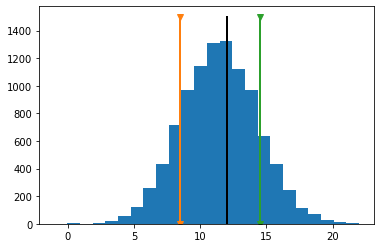

In [137]:
plt.hist(x=store_customers, bins=24);
plt.plot([12, 12], [0, 1500], 'k-', lw=2)
plt.plot([store_customers.mean()-store_customers.std(), store_customers.mean()-store_customers.std()], [0, 1500], 'v-', lw=2)
plt.plot([store_customers.mean()+store_customers.std(), store_customers.mean()+store_customers.std()], [0, 1500], 'v-', lw=2);

---
Notebook developed by: Kseniya Usovich